#### feature_selection methods:- 
    1.pearson correlation 
    2. variance threshould
    3. mutual info regressor 
    4.feature importance method  /  Extratree regressor /classifier 
    5. chi2 test with selectkbest
    6. variance inflation factor (VIF) / dropping the constant  features 
    

## using chi2 test :- 


In [16]:
import pandas as pd 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [17]:
df = pd.read_csv(r"F:\feature_selection\train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
df['price_range'].unique()
# dataset divided into 4 distinct price range 

array([1, 2, 3, 0], dtype=int64)

In [19]:
df.isnull().sum()
# no null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


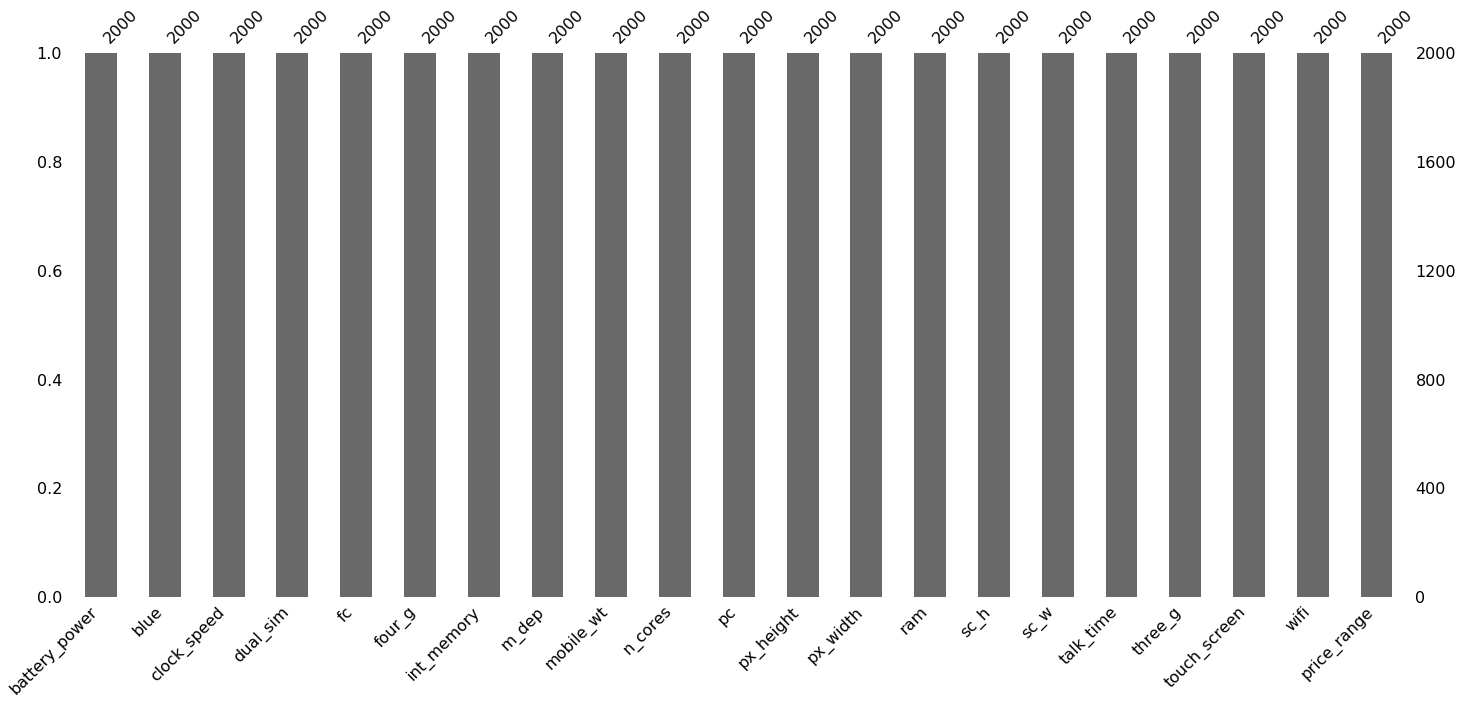

In [21]:
import missingno as msn
msn.bar(df)

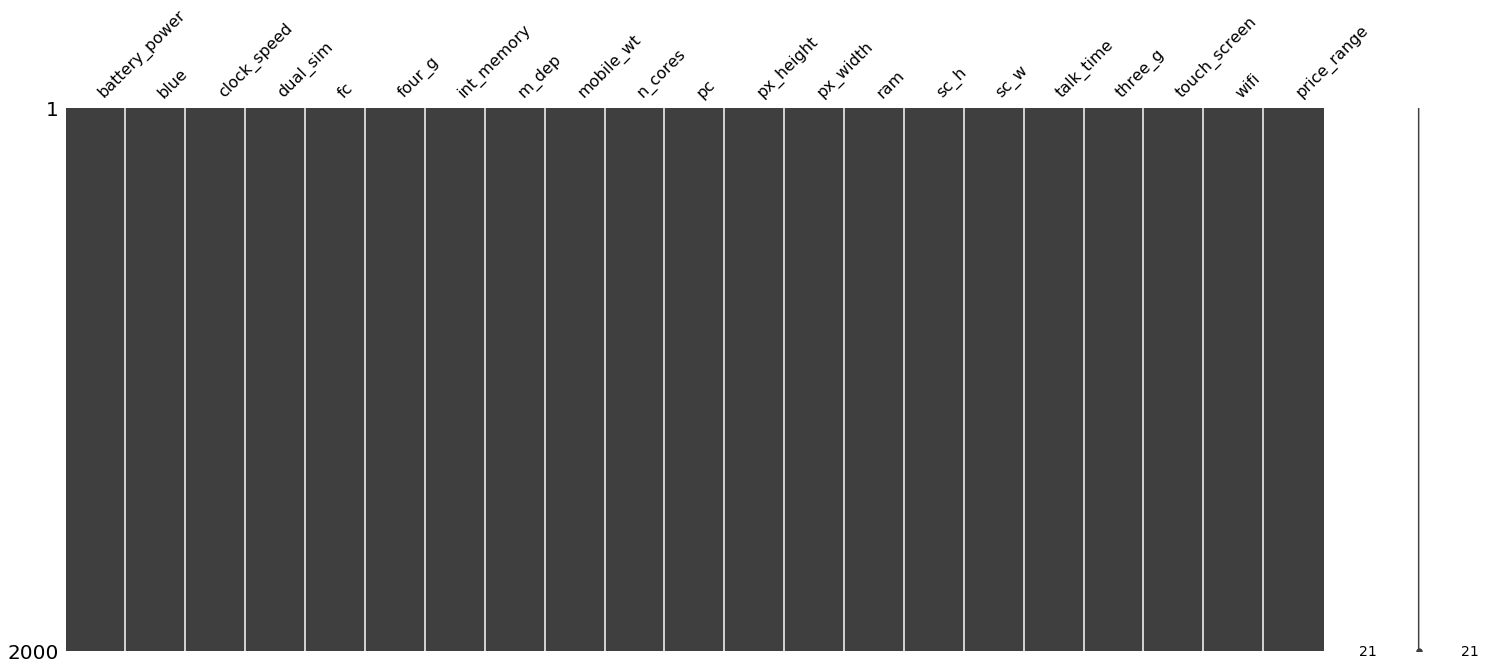

In [22]:
msn.matrix(df)

In [23]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [24]:
#df['price_range'].unique().sort_values()
df['price_range'].value_counts().index

Int64Index([3, 2, 1, 0], dtype='int64')

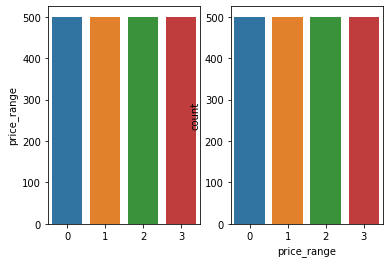

In [25]:
plt.subplot(1,2,1)
sns.barplot(x=(df['price_range'].value_counts().index) , y =df['price_range'].value_counts() )
# equal in range 
plt.subplot(1,2,2)
sns.countplot(df['price_range'])


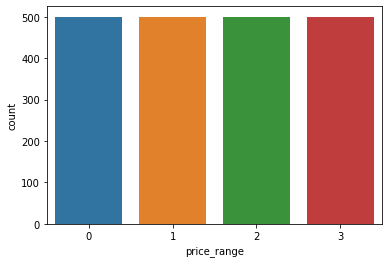

In [26]:
sns.countplot(df['price_range'])

In [27]:
x = df.drop("price_range" , axis=1)
y= df['price_range']
model   = SelectKBest(score_func=chi2 , k =x.shape[1] )  # x.shape[1]=2
feature = model.fit(x,y)

In [28]:
scores = pd.DataFrame(data=feature.scores_ , columns=['Scores'])
columns= pd.DataFrame(data=x.columns , columns=['features'])
p_values = pd.DataFrame(data= feature.pvalues_, columns=['P_values'])
feature_rank  = pd.concat([columns,scores , p_values] , axis=1).reset_index(drop=True ,col_level=1)
feature_rank.head()

,features,Scores,P_values
0,battery_power,14129.866576,0.000000
1,blue,0.723232,0.867726
2,clock_speed,0.648366,0.885276
3,dual_sim,0.631011,0.889298
4,fc,10.135166,0.017451


In [31]:
sorted_featurerank = feature_rank.sort_values(by='Scores' , ascending=False)

###### the features having high scores and low p values are considered as important features, this method also applicable to mixed type dataset 

In [43]:
#### top10 important features
sorted_featurerank.head(10).reset_index(drop=True)

,features,Scores,P_values
0,ram,931267.519053,0.000000e+00
1,px_height,17363.569536,0.000000e+00
2,battery_power,14129.866576,0.000000e+00
3,px_width,9810.586750,0.000000e+00
4,mobile_wt,95.972863,1.140850e-20
5,int_memory,89.839124,2.371978e-19
6,sc_w,16.480319,9.037659e-04
7,talk_time,13.236400,4.152292e-03
8,fc,10.135166,1.745143e-02
9,sc_h,9.614878,2.214014e-02


## feature importance / Extra tree regressor

    This method gives us scores for each Feature
    The features having high scores are the important features

for regrssion type probems ---> use Extra tree regressor
fo classification type problems ----> use extra tree classifier 

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [34]:
## important features 
model.feature_importances_

array([0.06878328, 0.01715611, 0.02732637, 0.01920014, 0.02688877,
       0.01554719, 0.03037177, 0.02843909, 0.03226693, 0.02944228,
       0.03111339, 0.04873467, 0.04753045, 0.43623733, 0.03171745,
       0.02784647, 0.03183714, 0.01303884, 0.01791723, 0.01860509])

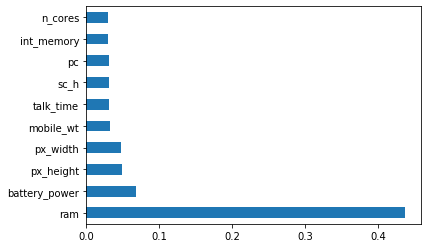

In [41]:
# cerate data frame for better visualization 
imp_features = pd.Series(model.feature_importances_ , index=x.columns)
imp_features.sort_values(ascending = False).head(10).plot(kind="barh")

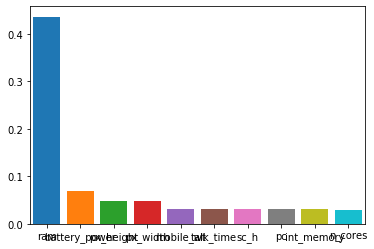

In [61]:
sns.barplot(x=imp_features.sort_values(ascending = False).head(10).index ,
            y =imp_features.sort_values(ascending = False).head(10) , orient='v'  , saturation=1)

In [62]:
# important features 
imp_features.sort_values(ascending = False).head(10).index

Index(['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt',
       'talk_time', 'sc_h', 'pc', 'int_memory', 'n_cores'],
      dtype='object')

## pearson correlation 

In [76]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


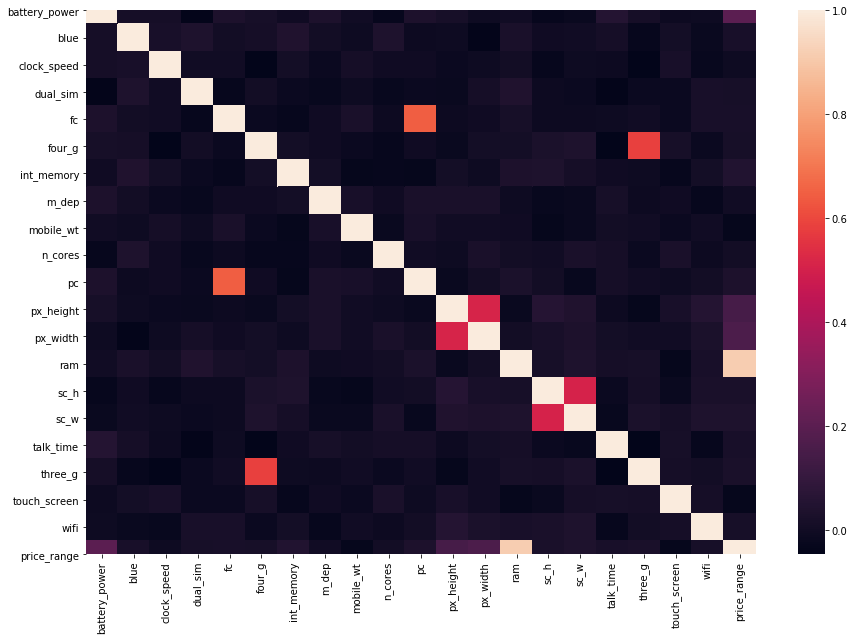

In [78]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr())

###### here we can see that some features(four_g , three_g , pc ,fc) have multicollinearity.
         1 . we need to remove one of the features from each pair of multicolinear features such as (4g,3g) we will keep anyone betn 
                 them.
         2.we can set any threshould value as per our requrements for checking the multicollinearity.
         3. Try to select those features which are highly correlated to the target variable.
         

## mutual info_classifier / information gain method

        Mutual information (MI) [1]_ between two random variables is a non-negative
            value, which measures the dependency between the variables. It is equal
            to zero if and only if two random variables are independent, and higher
            values mean higher dependency.

        The function relies on nonparametric methods based on entropy estimation
            from k-nearest neighbors distances as described in [2]_ and [3]_. Both
            methods are based on the idea originally proposed in [4]_.

        It can be used for univariate features selection, read more in the
        :ref:`User Guide <univariate_feature_selection>`.

        Parameters
            ----------
                            X : array_like or sparse matrix, shape (n_samples, n_features)
                                    Feature matrix.

                             y : array_like, shape (n_samples,)
                                Target vector.

In [79]:
from sklearn.feature_selection import mutual_info_classif , mutual_info_regression

In [88]:
model = mutual_info_classif(x,y)
model

array([2.65092975e-02, 1.30774026e-02, 1.16988519e-03, 0.00000000e+00,
       2.25790237e-02, 1.08612616e-02, 3.51261456e-02, 0.00000000e+00,
       0.00000000e+00, 4.44624698e-04, 0.00000000e+00, 2.55747255e-02,
       2.94453847e-02, 8.46029167e-01, 0.00000000e+00, 0.00000000e+00,
       3.53202000e-02, 1.35607844e-02, 0.00000000e+00, 8.83472746e-04])

In [91]:
mutual_data = pd.Series(model , index = x.columns)
mutual_data.sort_values(ascending=False) # the features having high values are important 

ram              0.846029
talk_time        0.035320
int_memory       0.035126
px_width         0.029445
battery_power    0.026509
px_height        0.025575
fc               0.022579
three_g          0.013561
blue             0.013077
four_g           0.010861
clock_speed      0.001170
wifi             0.000883
n_cores          0.000445
m_dep            0.000000
mobile_wt        0.000000
touch_screen     0.000000
pc               0.000000
dual_sim         0.000000
sc_h             0.000000
sc_w             0.000000
dtype: float64

## Variance_threshold

####  VarianceThreshold              
              
             Feature selector that removes all low-variance features or constant features .
             
             VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet
              some threshold. 
              By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
              
              As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either
              one or zero (on or off) in more than 80% of the samples. 
              Boolean features are Bernoulli random variables.
         


In [106]:
from sklearn.feature_selection import VarianceThreshold
model = VarianceThreshold(threshold=0.2) # it will remove that feature having variance < 0  or variance = 0
var_thres = model.fit(x,y)

In [108]:
var_thres.get_support()
# the features having threshold < 0.2 are false 
# else true 


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [109]:
constant_features = [  i for i in x.columns if i not in x.columns[var_thres.get_support()]]

In [110]:
constant_features

['m_dep', 'three_g']

In [111]:
# above features are the constant features having low variance 
# There may be a chance to  have repeated values in that features which leads to low varionce 
# we  can set any threshold-value , it's depends on problems & requirements 